# Top Spotify Songs 2000-2019 Data Analysis Project

Student: Isabella Lindgren <br/>
Course: Part-time Data Science Student <br/>
Instructor: Eli <br/>
Submission Date: TBD <br/>
Blog Post URL: 

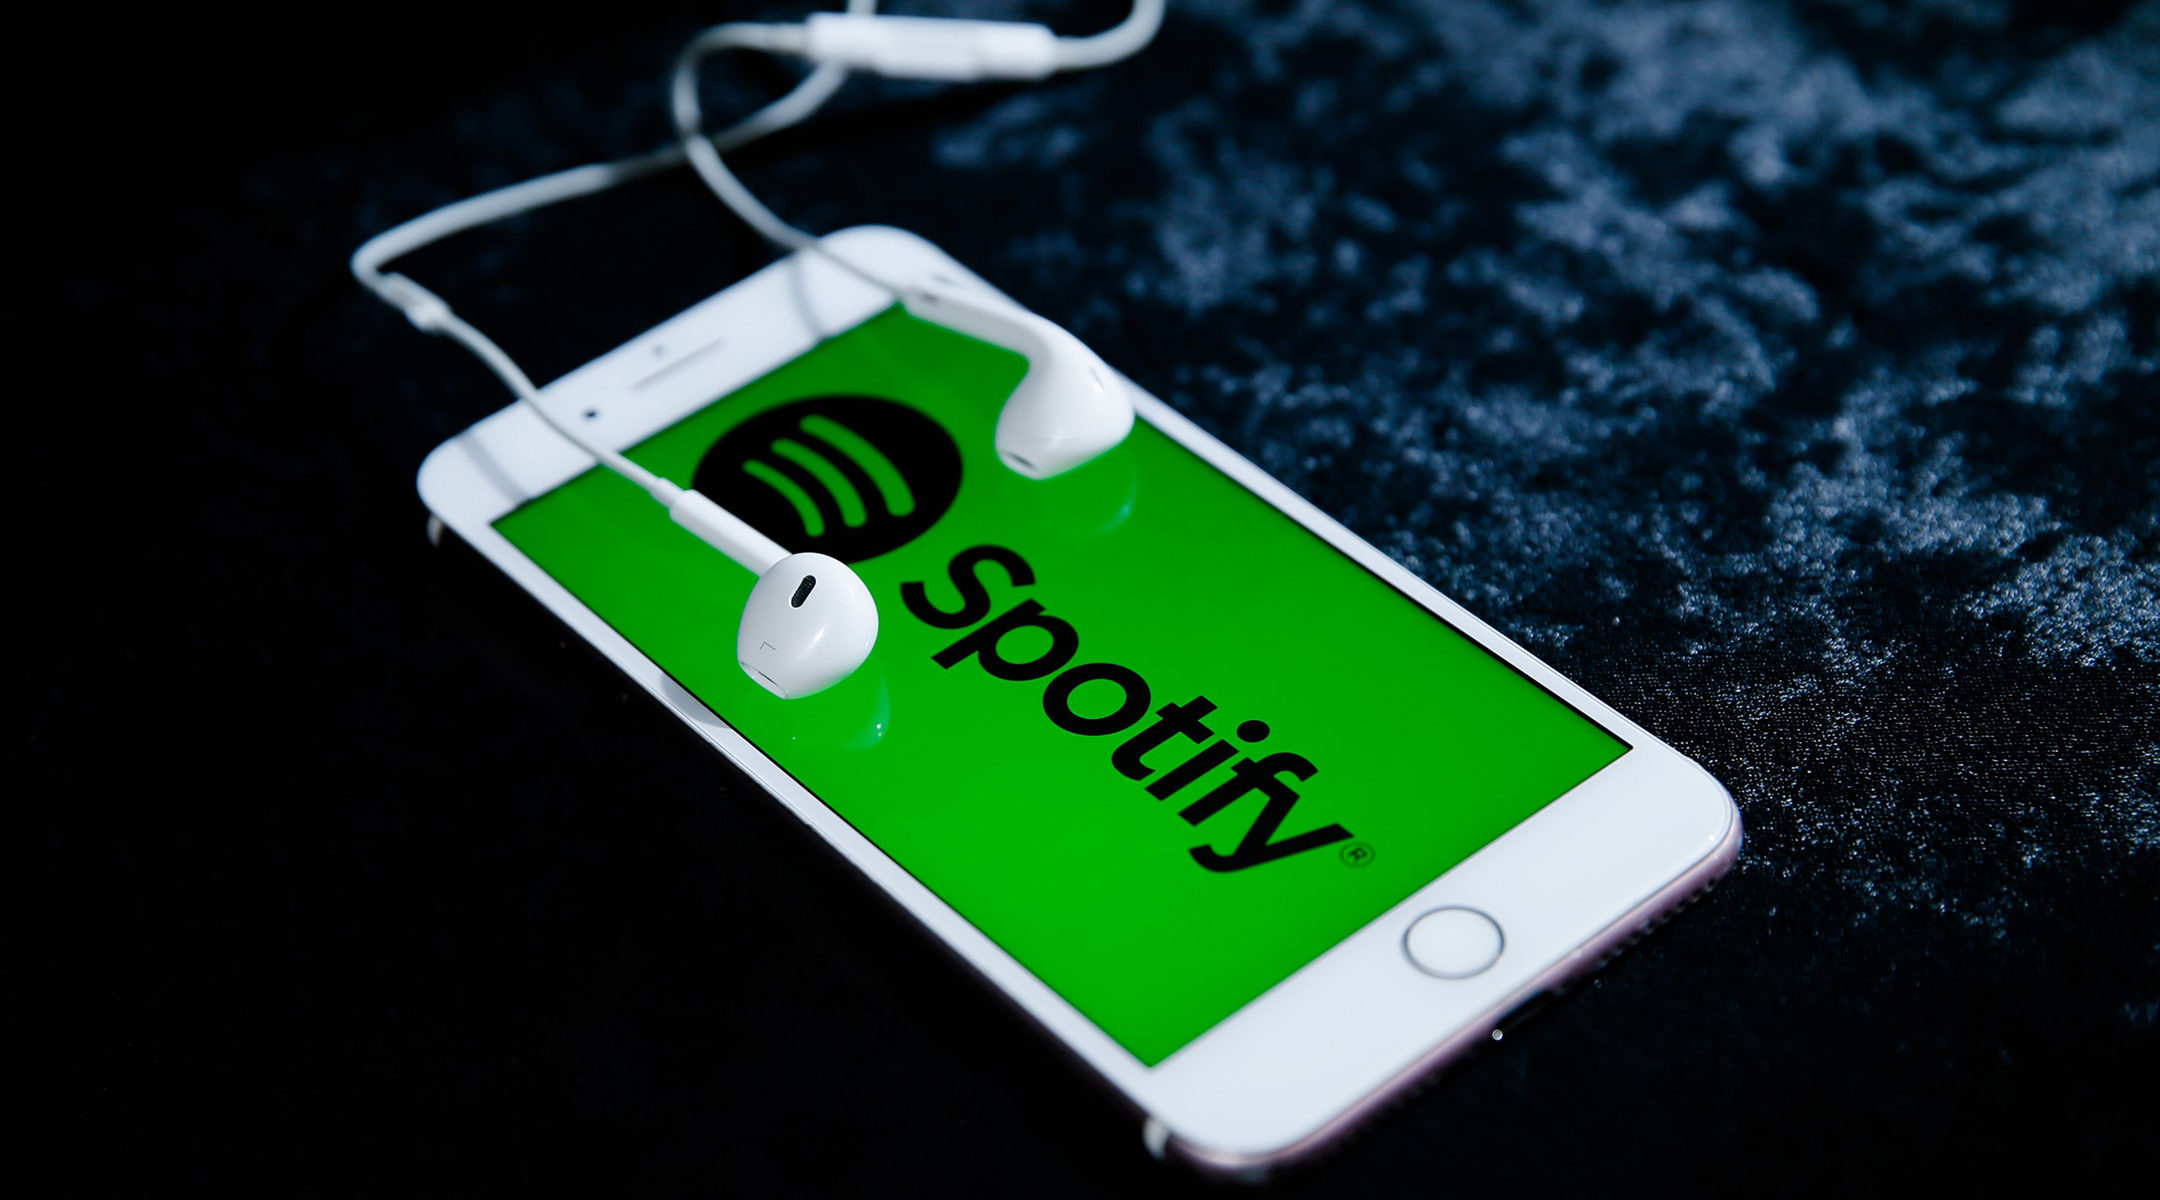

## Background

Spotify is a digital audio streaming platform that originated in Stockholm, Sweden. It has rapidly grown in popularity worldwide since it was founded in 2006. Spotify provides access to music, podcasts and video from record labels and media companies to consumers around the world! Users are able to browse a wide variety of tracks by artist, album, or genre and can create, edit and share playlists. 

## Loading the Data

The data for this project was sourced from kaggle: https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year

Our data utilizes the following attributes:

- ID
- Song Title
- Artist
- Genre of the Track
- Year Song was on Billboard
- BPM: Beats Per Minute (Tempo of the song)
- Energy of the song. The higher the value, the more energetic the song. 
- Danceability - The higher the value, the easier it is to dance to this song.
- dB - Loudness - The higher the value, the louder the song
- Live - The higher the value, the more likely the song is a live recording
- Valence - The higher the value, the more positive mood for the song.
- durLength - The duration of the song.
- Acousticness - The higher the value the more acoustic the song is.
- Speechiness - The higher the value the more spoken word the song contains.
- Popularity- The higher the value the more popular the song is.

You can read more in depth descriptions of the data attributes here: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

In [16]:
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split,cross_val_score, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline

In [21]:
data = pd.read_csv("top-spotify-songs-from-20102019-by-year/top10s.csv", encoding='ISO-8859-1')
data.head()

,Unnamed: 0,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


In [23]:
# drop the unnamed column since it is not useful as index
data.drop("Unnamed: 0", axis=1, inplace=True)
data.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Data Gathering

In [2]:
!pip install spotipy

Client ID: 64cb58457d8a44e98b93b1761b82be6d
Client Secret: 03500ec43fef4db6933523d4d5b43304

URI: http://localhost:8888/callback

In [ ]:
import spotipy
import sys
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials
cid = '64cb58457d8a44e98b93b1761b82be6d'
secret = '03500ec43fef4db6933523d4d5b43304'
username = 'izzy730'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
playlists = sp.user_playlists(username)

In [56]:
def get_playlist_tracks(username, playlist_id):
    tracks_list= []
    results = sp.user_playlist(username, playlist_id,
    fields="tracks,next")
    tracks = results['tracks']
    while tracks:
        tracks_list += [ item['track'] for (i, item) in
        enumerate(tracks['items']) ]
        tracks = sp.next(tracks)
    return tracks_list
def get_playlist_URIs(username, playlist_id):
    return [t["uri"] for t in get_playlist_tracks(username,
    playlist_id)]

In [37]:
bestofdecade_izzy = '37i9dQZF1DXaMu9xyX1HzK'
best_predf = get_playlist_tracks(username, bestofdecade_izzy)

In [38]:
best_df = pd.DataFrame(best_predf)
best_df.head()

,album,artists,available_markets,disc_number,duration_ms,episode,explicit,external_ids,external_urls,href,id,is_local,name,popularity,preview_url,track,track_number,type,uri
0,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,197436,False,False,{'isrc': 'GBWWP1702907'},{'spotify': 'https://open.spotify.com/track/2P...,https://api.spotify.com/v1/tracks/2P91MQbaiQOf...,2P91MQbaiQOfbiz9VqhqKQ,False,I Like Me Better,77,https://p.scdn.co/mp3-preview/fa069a3be2d69aab...,True,1,track,spotify:track:2P91MQbaiQOfbiz9VqhqKQ
1,"{'album_type': 'single', 'artists': [{'externa...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,201660,False,True,{'isrc': 'USUM71813499'},{'spotify': 'https://open.spotify.com/track/5p...,https://api.spotify.com/v1/tracks/5p7ujcrUXASC...,5p7ujcrUXASCNwRaWNHR1C,False,Without Me,85,None,True,1,track,spotify:track:5p7ujcrUXASCNwRaWNHR1C
2,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,197866,False,False,{'isrc': 'GBAHS1900885'},{'spotify': 'https://open.spotify.com/track/70...,https://api.spotify.com/v1/tracks/70eFcWOvlMOb...,70eFcWOvlMObDhURTqT4Fv,False,Beautiful People (feat. Khalid),81,https://p.scdn.co/mp3-preview/f94d8d0c1b37773f...,True,1,track,spotify:track:70eFcWOvlMObDhURTqT4Fv
3,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,181026,False,False,{'isrc': 'USUG11900515'},{'spotify': 'https://open.spotify.com/track/22...,https://api.spotify.com/v1/tracks/22vgEDb5hykf...,22vgEDb5hykfaTwLuskFGD,False,Sucker,86,None,True,1,track,spotify:track:22vgEDb5hykfaTwLuskFGD
4,"{'album_type': 'album', 'artists': [{'external...",[{'external_urls': {'spotify': 'https://open.s...,"[AD, AE, AR, AT, AU, BE, BG, BH, BO, BR, CA, C...",1,203417,False,False,{'isrc': 'GBUM71800366'},{'spotify': 'https://open.spotify.com/track/2i...,https://api.spotify.com/v1/tracks/2iUXsYOEPhVq...,2iUXsYOEPhVqEBwsqP70rE,False,Youngblood,82,None,True,1,track,spotify:track:2iUXsYOEPhVqEBwsqP70rE


In [39]:
#modified get features function
def get_audio_features (track_URIs) :
    features = []
    r = splitlist(track_URIs,50)
    for pack in range(len(r)):
        features = features + (sp.audio_features(r[pack]))
    df = pd.DataFrame.from_dict(features)
    df["uri"] = track_URIs
    return df

In [46]:
# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,10000,50):
    track_results = sp.search(q='year: 2018', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
      

SpotifyException: http status: 404, code:-1 - https://api.spotify.com/v1/search?q=year%3A+2018&limit=50&offset=2000&type=track:
 Not found.

In [ ]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

In [ ]:
spotify_token = util.prompt_for_user_token(username,
                                           client_id=cid,
                                           client_secret=secret,
                                           redirect_uri="http://localhost:8888/callback")

In [6]:
import requests
import csv
import time
import json
import sys
import imp
imp.reload(sys)

<module 'sys' (built-in)>

In [47]:
def main():
    
    queries = ['2000','2001','2002','2003','2004','2005','2006','2007','2008',
              '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
              
    # queries = ['2017']
    # Query and request from API are different!
    # Number of track query need to make
    num_tracks_per_query = 10000

    for query in queries:
        
        ltrack = []
        song_ids = []
        artist_ids = []
        album_ids = []
        
        audioF = []
        artist_data = []
        album_data = []

        
        col1 = [   'popularity',
                   'song_id',     'artist_id',     'album_id', 
                   'song_name',   'artist_name',   'album_name', 
                   'explicit',    'disc_number',   'track_number']
        
        
        col2 =  [  'song_id', 'uri',
                   'tempo', 'type',
                   'key', 'loudness',
                   'mode', 'speechiness',
                   'liveness', 'valence',
                   'danceability', 'energy',
                   'track_href', 'analysis_url',
                   'duration_ms', 'time_signature',
                   'acousticness', 'instrumentalness' ]
        
        col3 =  [  'artist_id',  'artist_genres',  'artist_popularity']
        
        col4 =  [  'album_id',  'album_genres',   'album_popularity',  'album_release_date']
        
        n = 0 
        idx = 0
        
        while idx < num_tracks_per_query:  
            
            API_search_request(query, 'track', 50, idx, ltrack, song_ids, artist_ids, album_ids)   
            n +=1
            print(('\n>> this is No '+ str(n) + ' search End '))
            idx += 50 
            # Limit API requests to at most 3ish calls / second
            time.sleep(0.3)                                     
        
        print(len(song_ids))
        ## spotify API "search" option vs here track/audiofeature query
        for idx in range(0, len(song_ids), 50):
            API_get_audio_feature(song_ids[idx: idx+50], audioF)
            time.sleep(0.3)
        
        for idx in range(0, len(artist_ids), 50):
            API_get_artists(artist_ids[idx: idx+50], artist_data)
            time.sleep(0.3)
        
        for idx in range(0, len(album_ids), 20):
            API_get_albums(album_ids[idx: idx+20], album_data)
            time.sleep(0.3)    
        
        
        df1 = pd.DataFrame(ltrack, columns=col1)
        
        df2 = pd.DataFrame(audioF, columns=col2) 
        
        
        df3 = pd.DataFrame(artist_data, columns=col3)
        
        df4 = pd.DataFrame(album_data, columns=col4)
        
        df = df1.merge(df2, on='song_id', how='outer').merge(df3, on='artist_id', how='outer').merge(
             df4, on='album_id', how='outer')
        
        filename = query + '.csv'                      
        
        df.to_csv(filename, sep='\t')
        
        print ('finish')
        print (query)

NameError: name 'query' is not defined

Spotify API: https://developer.spotify.com/documentation/web-api/reference/tracks/

In [ ]:
url = 'https://api.spotify.com/v1/search?q=year:'+ keywords +'&type=' + search_type +'&offset='+ off +'&limit=' + lim
requests.get(url).json()

In [ ]:
print('start..')


def main():
    
    queries = ['2000','2001','2002','2003','2004','2005','2006','2007','2008',
              '2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']
              
    # queries = ['2017']
    # Query and request from API are different!
    # Number of track query need to make
    num_tracks_per_query = 10000

    for query in queries:
        
        ltrack = []
        song_ids = []
        artist_ids = []
        album_ids = []
        
        audioF = []
        artist_data = []
        album_data = []

        
        col1 = [   'popularity',
                   'song_id',     'artist_id',     'album_id', 
                   'song_name',   'artist_name',   'album_name', 
                   'explicit',    'disc_number',   'track_number']
        
        
        col2 =  [  'song_id', 'uri',
                   'tempo', 'type',
                   'key', 'loudness',
                   'mode', 'speechiness',
                   'liveness', 'valence',
                   'danceability', 'energy',
                   'track_href', 'analysis_url',
                   'duration_ms', 'time_signature',
                   'acousticness', 'instrumentalness' ]
        
        col3 =  [  'artist_id',  'artist_genres',  'artist_popularity']
        
        col4 =  [  'album_id',  'album_genres',   'album_popularity',  'album_release_date']
        
        n = 0 
        idx = 0
        
        while idx < num_tracks_per_query:  
            
            API_search_request(query, 'track', 50, idx, ltrack, song_ids, artist_ids, album_ids)   
            n +=1
            print(('\n>> this is No '+ str(n) + ' search End '))
            idx += 50 
            # Limit API requests to at most 3ish calls / second
            time.sleep(0.3)                                     
        
        print(len(song_ids))
        ## spotify API "search" option vs here track/audiofeature query
        for idx in range(0, len(song_ids), 50):
            API_get_audio_feature(song_ids[idx: idx+50], audioF)
            time.sleep(0.3)
        
        for idx in range(0, len(artist_ids), 50):
            API_get_artists(artist_ids[idx: idx+50], artist_data)
            time.sleep(0.3)
        
        for idx in range(0, len(album_ids), 20):
            API_get_albums(album_ids[idx: idx+20], album_data)
            time.sleep(0.3)    
        
        
        df1 = pd.DataFrame(ltrack, columns=col1)
        
        df2 = pd.DataFrame(audioF, columns=col2) 
        
        
        df3 = pd.DataFrame(artist_data, columns=col3)
        
        df4 = pd.DataFrame(album_data, columns=col4)
        
        df = df1.merge(df2, on='song_id', how='outer').merge(df3, on='artist_id', how='outer').merge(
             df4, on='album_id', how='outer')
        
        filename = query + '.csv'                      
        
        df.to_csv(filename, sep='\t')
        
        print ('finish')
        print (query)

def API_search_request(keywords, search_type, results_limit, results_offset, ltrack, song_ids, artist_ids, album_ids):

    off = str(results_offset)
    lim = str(results_limit)

    url = 'https://api.spotify.com/v1/search?q=year:'+ keywords +'&type=' + search_type +'&offset='+ off +'&limit=' + lim

    r = requests.get(url)

    if r: 
        j = r.json()
    else:
        return r


    litem = j['tracks']['items']
    #print(len(ll))
    try:
        for l in litem:
        
            if l['id'] not in song_ids:
                song_ids.append( l['id'] )

            if l['artists'][0]['id'] not in artist_ids:
                artist_ids.append( l['artists'][0]['id'] )

            if l['album']['id'] not in album_ids:
                album_ids.append(  l['album']['id'] )
        
        
            k =   [  l['popularity'],
        
                     l['id'], 
                     l['artists'][0]['id'],
                     l['album']['id'],

                     l['name'],
                     l['artists'][0]['name'],
                     l['album']['name'],

                     l['explicit'], 
                     l['disc_number'],
                     l['track_number']]
        
            ltrack.append(k)
    except:
         ValueError
      
   # f.close()
    #return j


def API_get_audio_feature(songids, audioF):
    
    #print(songids)
    #print '>> call art several'
    track_ids = ','.join(songids)

    url = 'https://api.spotify.com/v1/audio-features?ids=' + track_ids  
    ## access_token will expire soon
    access_token = (  'Bearer BQDAZNalQ6KCd8pRM0Exu3D-tzdeodFYL86pdq8kz'
                      'qN8i5gqeLMNeCgyPmZ1B3mgQ2YGd29tL06jxeNzOMkhmi4GM'
                      'QQLQ_ZfQUroBMRSMj10IOjEo-cX7YsfzH_v3eUlN4wXgDd4z'
                      'njNqrPu-MI9qRz3_jyb44urQ7J5TeOeWk4kvHKfD36TplacQ'
                      'DeYJe49DsaAQWuCSe5kdt1r7r0GqugSH85vOaa5qrqMaGbKM'
                      'DnZ-2aWzuLUE37Vh3U2MR3VEdgHPIxlQtC_vfTBwiMZZcY55'
                      'Q1aZuKSrGL9A6MC2hUi4CgRMD1mXwE9l8bLJQ')
    
    
    r = requests.get(url, headers={"Accept": "application/json" , "Authorization": access_token})
    
    if r: 
        j = r.json()
    else:
        return r
    
    # print(j)
    ll = j['audio_features']

    try:

        for l in ll:
            k =  [  l['id'],l['uri'],
                    l['tempo'],l['type'],
                    l['key'],l['loudness'],
                    l['mode'],l['speechiness'],
                    l['liveness'],l['valence'],
                    l['danceability'],l['energy'],
                    l['track_href'],l['analysis_url'],
                    l['duration_ms'],l['time_signature'],
                    l['acousticness'],l['instrumentalness'] ]

            audioF.append(k)
        
    except:
        ValueError
    
        

    #return j

def API_get_artists(artist_ids, artist_data):

    art_ids = ','.join(artist_ids)

    url = 'https://api.spotify.com/v1/artists?ids=' + art_ids

    r = requests.get(url)

    if r:
        j = r.json()
    else:
       #print 'for this specific art_ids, response reaches maximum, return'
       return r

    
    ll = j['artists']

    try:
        for l in ll:
        
            k = [  l['id'], 
                   l['genres'],
                   l['popularity'] ]

            artist_data.append(k)
    
    except:
        ValueError
    


def API_get_albums(album_ids, album_data):
   

    alb_ids = ','.join(album_ids)

    url = 'https://api.spotify.com/v1/albums?ids=' + alb_ids
    r = requests.get(url)

    if r:
       j = r.json()
    else:
        return r


    ll = j['albums']
    
    try:
        for l in ll:
            k = [  l['id'], 
                   l['genres'],
                   l['popularity'],
                   l['release_date'] ]

            album_data.append(k)
    
    except:
        ValueError


if __name__ == '__main__':
    main()

## Data Preprocessing

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 14 columns):
title        603 non-null object
artist       603 non-null object
top genre    603 non-null object
year         603 non-null int64
bpm          603 non-null int64
nrgy         603 non-null int64
dnce         603 non-null int64
dB           603 non-null int64
live         603 non-null int64
val          603 non-null int64
dur          603 non-null int64
acous        603 non-null int64
spch         603 non-null int64
pop          603 non-null int64
dtypes: int64(11), object(3)
memory usage: 66.0+ KB


We can see that title, artist, and genre are categorical variables and the rest are numerical. All variables have the same amount of entries so there are no missing values.  

In [54]:
# Renaming few columns to make more sense

data.rename(columns = {'top genre': 'top_genre', 'bpm': 'beats_per_minute', 'nrgy': 'energy', 
                       'dnce': 'danceability', 'dB': 'loudness(dB)', 'live': 'liveness', 
                       'val': 'valence', 'dur': 'length', 'acous': 'acousticness', 
                       'spch': 'speechiness', 'pop': 'popularity'}, inplace=True)
data.head()

,title,artist,top_genre,year,beats_per_minute,energy,danceability,loudness(dB),liveness,valence,length,acousticness,speechiness,popularity
0,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
1,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
2,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
3,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
4,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Exploratory Data Analysis

## Hypothesis Testing

## Time Series

## Creating a Playlist

## Predicting Hit Songs

## Song Recommendations